In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_test=pd.read_csv("test.csv")

In [4]:
# sns.set(rc={'figure.figsize':(15, 6)})

In [5]:
df_train.head().style.background_gradient(cmap='Blues')

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [6]:
shape = df_train.shape
print(f'The no. of rows in dataset is {shape[0]} and no. of columns is {shape[1]}')

The no. of rows in dataset is 70128 and no. of columns is 6


In [7]:
df_train.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [8]:
df_train.drop('row_id', axis = 1, inplace = True)

In [9]:
df_test.drop('row_id', axis = 1, inplace = True)

In [10]:
df_test.head()

,date,country,store,product
0,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [11]:
df_train.isnull().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [12]:
df_test.isnull().sum()

date       0
country    0
store      0
product    0
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      70128 non-null  object
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [14]:
for i in df_train.columns.to_list():
    if df_train[i].dtype == 'O':
        print(f'Feature ::::: {i}')
        print(df_train[i].value_counts())
        print('#####')

Feature ::::: date
2017-01-01    48
2019-09-10    48
2019-09-08    48
2019-09-07    48
2019-09-06    48
              ..
2018-05-01    48
2018-04-30    48
2018-04-29    48
2018-04-28    48
2020-12-31    48
Name: date, Length: 1461, dtype: int64
#####
Feature ::::: country
Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64
#####
Feature ::::: store
KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64
#####
Feature ::::: product
Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64
#####


In [15]:
for i in df_test.columns.to_list():
    if df_test[i].dtype == 'O':
        print(f'Feature ::::: {i}')
        print(df_test[i].value_counts())
        print('#####')

Feature ::::: date
2021-01-01    48
2021-09-09    48
2021-09-07    48
2021-09-06    48
2021-09-05    48
              ..
2021-05-01    48
2021-04-30    48
2021-04-29    48
2021-04-28    48
2021-12-31    48
Name: date, Length: 365, dtype: int64
#####
Feature ::::: country
Belgium    2920
France     2920
Germany    2920
Italy      2920
Poland     2920
Spain      2920
Name: country, dtype: int64
#####
Feature ::::: store
KaggleMart    8760
KaggleRama    8760
Name: store, dtype: int64
#####
Feature ::::: product
Kaggle Advanced Techniques          4380
Kaggle Getting Started              4380
Kaggle Recipe Book                  4380
Kaggle for Kids: One Smart Goose    4380
Name: product, dtype: int64
#####


In [16]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [17]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [18]:
#Extract year
df_train['date_year'] = df_train['date'].dt.year
df_test['date_year'] = df_test['date'].dt.year

In [19]:
#Extract Month
df_train['date_month'] = df_train['date'].dt.month
df_test['date_month'] = df_test['date'].dt.month

In [20]:
#Extract Days
df_train['day'] = df_train['date'].dt.day
df_test['day'] = df_test['date'].dt.day

In [21]:
#Week days
df_train['week_day'] = df_train['date'].dt.dayofweek
df_test['week_day'] = df_test['date'].dt.dayofweek

In [22]:
df_train.head()

,date,country,store,product,num_sold,date_year,date_month,day,week_day
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,6
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,6
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1,6
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1,6
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1,6


In [23]:
df_test.head()

,date,country,store,product,date_year,date_month,day,week_day
0,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,2021,1,1,4
1,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,2021,1,1,4
2,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,2021,1,1,4
3,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021,1,1,4
4,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,2021,1,1,4


In [24]:
df_test['date_year'].value_counts()

2021    17520
Name: date_year, dtype: int64

In [25]:
df_train['date_year'].value_counts()

2020    17568
2017    17520
2018    17520
2019    17520
Name: date_year, dtype: int64

In [26]:
df_train['date_month'].value_counts()

1     5952
3     5952
5     5952
7     5952
8     5952
10    5952
12    5952
4     5760
6     5760
9     5760
11    5760
2     5424
Name: date_month, dtype: int64

In [27]:
df_train['week_day'].value_counts()

6    10032
0    10032
1    10032
2    10032
3    10032
4     9984
5     9984
Name: week_day, dtype: int64

In [28]:
df_train.drop('date', axis = 1, inplace = True )

In [29]:
df_test.drop('date', axis = 1, inplace = True )

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     17520 non-null  object
 1   store       17520 non-null  object
 2   product     17520 non-null  object
 3   date_year   17520 non-null  int64 
 4   date_month  17520 non-null  int64 
 5   day         17520 non-null  int64 
 6   week_day    17520 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 958.2+ KB


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     70128 non-null  object
 1   store       70128 non-null  object
 2   product     70128 non-null  object
 3   num_sold    70128 non-null  int64 
 4   date_year   70128 non-null  int64 
 5   date_month  70128 non-null  int64 
 6   day         70128 non-null  int64 
 7   week_day    70128 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 4.3+ MB


In [32]:
country_names = df_train.country.value_counts().index

In [33]:
country = df_train.country.value_counts().values

([<matplotlib.patches.Wedge at 0x2366b917280>,
 [Text(0.9526279355804298, 0.5500000148652441, 'Belgium'),
  Text(-5.149471629032507e-08, 1.0999999999999988, 'France'),
  Text(-0.9526279870751434, 0.5499999256737774, 'Germany'),
  Text(-0.952627884085708, -0.5500001040567056, 'Italy'),
  Text(1.5448414935947287e-07, -1.0999999999999892, 'Poland'),
  Text(0.9526280385698485, -0.5499998364823061, 'Spain')],
 [Text(0.5196152375893253, 0.30000000810831495, '16.67%'),
  Text(-2.8088027067450036e-08, 0.5999999999999993, '16.67%'),
  Text(-0.5196152656773508, 0.299999959458424, '16.67%'),
  Text(-0.5196152095012951, -0.30000005675820307, '16.67%'),
  Text(8.426408146880338e-08, -0.5999999999999941, '16.67%'),
  Text(0.5196152937653719, -0.29999991080853056, '16.67%')])

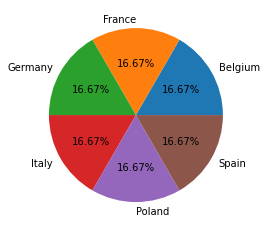

In [34]:
plt.pie(country, labels= country_names, autopct = '%1.2f%%')

In [35]:
df_train.store.value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [36]:
df_train['product'].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [37]:
categorical_feature = [feature for feature in df_train.columns if df_train[feature].dtype == 'O']

In [38]:
categorical_feature

['country', 'store', 'product']

In [39]:
categorical_feature_test = [feature for feature in df_test.columns if df_test[feature].dtype == 'O']

In [40]:
categorical_feature_test

['country', 'store', 'product']

In [41]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in categorical_feature:
    df_train[feature] = le.fit_transform(df_train[feature].astype(str))

In [42]:
df_train.head()

,country,store,product,num_sold,date_year,date_month,day,week_day
0,0,0,0,663,2017,1,1,6
1,0,0,1,615,2017,1,1,6
2,0,0,2,480,2017,1,1,6
3,0,0,3,710,2017,1,1,6
4,0,1,0,240,2017,1,1,6


In [43]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in categorical_feature_test:
    df_test[feature] = le.fit_transform(df_test[feature].astype(str))

In [44]:
df_test.head()

,country,store,product,date_year,date_month,day,week_day
0,0,0,0,2021,1,1,4
1,0,0,1,2021,1,1,4
2,0,0,2,2021,1,1,4
3,0,0,3,2021,1,1,4
4,0,1,0,2021,1,1,4


In [45]:
y_train = df_train['num_sold']

In [46]:
y_train.head()

0    663
1    615
2    480
3    710
4    240
Name: num_sold, dtype: int64

In [47]:
def smape(actual, predicted):
    return np.mean(np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual))/2))*100

In [48]:
n = 52560 

In [49]:
val_set = df_train.iloc[n:len(df_train)]

In [50]:
y_test = val_set['num_sold']

In [51]:
df_train.drop('num_sold', axis = 1, inplace = True)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [53]:
model =  LGBMRegressor(objective ='regression',learning_rate = 0.05, max_depth = 3, metric ='mae',
                            n_estimators = 500, random_state = 42)
model.fit(df_train,y_train)

LGBMRegressor(learning_rate=0.05, max_depth=3, metric='mae', n_estimators=500,
              objective='regression', random_state=42)

In [54]:
y_pred = model.predict(df_test)

In [55]:
df_subm = pd.read_csv('sample_submission.csv')

In [56]:
df_subm['num_sold']= y_pred
df_subm=df_subm.round({"num_sold":0})
df_subm

,row_id,num_sold
0,70128,481.0
1,70129,356.0
2,70130,306.0
3,70131,489.0
4,70132,182.0
...,...,...
17515,87643,565.0
17516,87644,204.0
17517,87645,190.0
17518,87646,161.0


In [57]:
df_subm.head()

,row_id,num_sold
0,70128,481.0
1,70129,356.0
2,70130,306.0
3,70131,489.0
4,70132,182.0


In [58]:
df_subm.to_csv('submission.csv', index=False)

In [59]:
model1 = RandomForestRegressor()

In [60]:
model1.fit(df_train, y_train)

RandomForestRegressor()

In [61]:
y_pred = model1.predict(df_test)

In [62]:
df_subm['num_sold']= y_pred
df_subm=df_subm.round({"num_sold":0})
df_subm

,row_id,num_sold
0,70128,475.0
1,70129,393.0
2,70130,350.0
3,70131,504.0
4,70132,166.0
...,...,...
17515,87643,630.0
17516,87644,217.0
17517,87645,162.0
17518,87646,138.0


In [63]:
df_subm.to_csv('submission3.csv', index=False)

In [64]:
model3 = LinearRegression()

In [66]:
model3.fit(df_train, y_train)

LinearRegression()

In [67]:
y_pred = model3.predict(df_test)

In [68]:
df_subm['num_sold']= y_pred
df_subm=df_subm.round({"num_sold":0})
df_subm

,row_id,num_sold
0,70128,369.0
1,70129,370.0
2,70130,371.0
3,70131,372.0
4,70132,181.0
...,...,...
17515,87643,278.0
17516,87644,87.0
17517,87645,88.0
17518,87646,89.0


In [69]:
df_subm.to_csv('submission4.csv', index=False)